**ebb** Tutorial
================

In [1]:
from __future__ import print_function, division

In [2]:
import ebb
from ebb.units import Quantity as Q
from ebb.fluids import Air, Water, Nitrogen, Oxygen, Helium
from ebb.pipes import CircularPipe, RectangularPipe

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import numpy as np

## Fluids

### Incompressable Fluids

In [3]:
print(Water)
print(Water.viscosity().to('cpoise'))
print(Water.viscosity(temperature=40, pressure='1.1 bar').to('cpoise'))

<class 'ebb.fluids.Water.Water'>
0.8904389816146542 centipoise
0.6514278843596056 centipoise


### Compressible Fluids

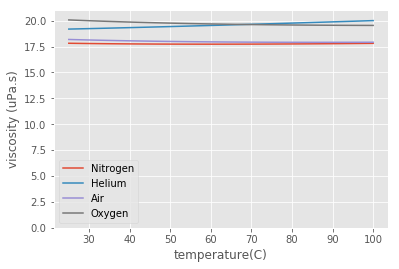

In [14]:
temperature = np.linspace(25, 100)
for fluid in Nitrogen, Helium, Air, Oxygen:
    viscosity = [fluid.viscosity(temperature=t).m for t in temperature]
    plt.plot(temperature, viscosity, label=fluid.__name__)
plt.xlabel('temperature(C)')
plt.ylabel('viscosity (uPa.s)')
plt.ylim([0, 21])
plt.legend()
plt.show()

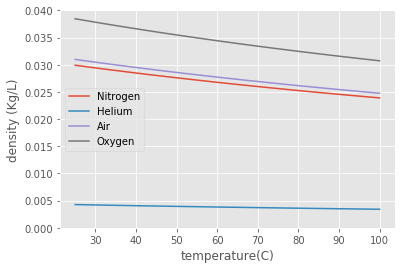

In [18]:
temperature = np.linspace(25, 100)
for fluid in Nitrogen, Helium, Air, Oxygen:
    density = [fluid.density(temperature=t).m for t in temperature]
    plt.plot(temperature, density, label=fluid.__name__)
plt.xlabel('temperature(C)')
plt.ylabel('density (Kg/L)')
plt.ylim([0, 0.04])
plt.legend()
plt.show()

## Pipes

### Circular Pipe

CircularPipe(radius=<Quantity(0.001, 'meter')>, length=<Quantity(10, 'meter')>)
0.9476595391457666 meter / second


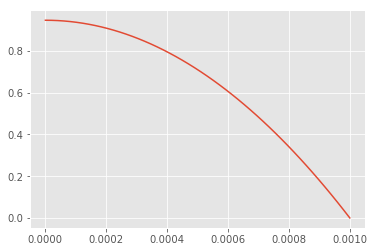

In [5]:
pipe = CircularPipe(0.001, 10)
print(pipe)
print(pipe.maximum_velocity(fluid=Air, pressure=Q('0.1 psi')))

radii = Q(np.linspace(0, .001), 'm')
v = [pipe.velocity(r, 0, fluid=Air, pressure=Q('0.1 psi')).m for r in radii]
plt.plot(radii, v)
plt.show()

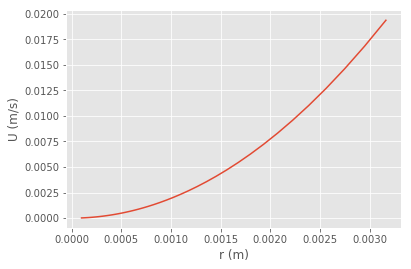

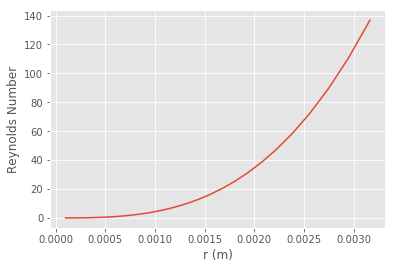

In [6]:
L = Q('1 m')

radii = Q(np.logspace(-4, -2.5), 'm')

velocities = []
reynolds = []

for r in radii:
    pipe = CircularPipe(r, L)
    velocities.append(pipe.maximum_velocity(fluid=Water, pressure=Q('0.001 psi')).m)
    reynolds.append(pipe.reynolds(fluid=Water, pressure=Q('0.001 psi')))
plt.plot(radii, velocities)
plt.xlabel('r (m)')
plt.ylabel('U (m/s)')
plt.show()
plt.plot(radii, reynolds)
plt.xlabel('r (m)')
plt.ylabel('Reynolds Number')
plt.show()